In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the dataset

dataset = pd.read_csv("..\data\COUR_210401_220522_30min.csv")
dataset.head()

<TICKER>  <PER>    <DATE>  <TIME>   <OPEN>  <HIGH>    <LOW>  <CLOSE>  \
0  US1.COUR     15  20210401  164500  45.5000   45.90  43.2701  45.2280   
1  US1.COUR     15  20210401  170000  45.1671   48.70  45.1500  48.6000   
2  US1.COUR     15  20210401  171500  48.5900   51.45  48.1500  48.6249   
3  US1.COUR     15  20210401  173000  48.9900   50.49  48.3700  49.7700   
4  US1.COUR     15  20210401  174500  49.7700   54.39  49.6400  54.1006   

    <VOL>  
0  316139  
1  273807  
2  494088  
3  256379  
4  644147

In [3]:
# Rename columns and remove redandunt ones

dataset.columns = [x[1:-1].capitalize() for x in dataset.columns]
dataset.drop(columns=["Ticker", "Per"], inplace = True)
dataset.loc[dataset["Time"] == 0, "Time"] = "000000"
dataset.tail()

Date    Time    Open    High     Low  Close   Vol
7122  20220520  220000  15.230  15.310  15.230  15.31  1100
7123  20220520  221500  15.245  15.245  15.180  15.18  2293
7124  20220520  223000  15.280  15.350  15.275  15.35   500
7125  20220520  224500  15.420  15.550  15.390  15.52  1721
7126  20220520  230000  15.520  15.540  15.460  15.54  2854

In [4]:
# Convert date and time columns into datetime format

dataset["Date and Time"] = [str(x) + " " + str(y) for x, y in zip(dataset.Date, dataset.Time)]
dataset["Date and Time"] = pd.to_datetime(dataset["Date and Time"], format="%Y%m%d %H%M%S")
dataset.set_index(dataset["Date and Time"], inplace = True)
dataset.drop(columns = ["Date", "Time", "Date and Time"], inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7127 entries, 2021-04-01 16:45:00 to 2022-05-20 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7127 non-null   float64
 1   High    7127 non-null   float64
 2   Low     7127 non-null   float64
 3   Close   7127 non-null   float64
 4   Vol     7127 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 334.1 KB


In [5]:
dataset

Open    High      Low    Close     Vol
Date and Time                                                 
2021-04-01 16:45:00  45.5000  45.900  43.2701  45.2280  316139
2021-04-01 17:00:00  45.1671  48.700  45.1500  48.6000  273807
2021-04-01 17:15:00  48.5900  51.450  48.1500  48.6249  494088
2021-04-01 17:30:00  48.9900  50.490  48.3700  49.7700  256379
2021-04-01 17:45:00  49.7700  54.390  49.6400  54.1006  644147
...                      ...     ...      ...      ...     ...
2022-05-20 22:00:00  15.2300  15.310  15.2300  15.3100    1100
2022-05-20 22:15:00  15.2450  15.245  15.1800  15.1800    2293
2022-05-20 22:30:00  15.2800  15.350  15.2750  15.3500     500
2022-05-20 22:45:00  15.4200  15.550  15.3900  15.5200    1721
2022-05-20 23:00:00  15.5200  15.540  15.4600  15.5400    2854

[7127 rows x 5 columns]

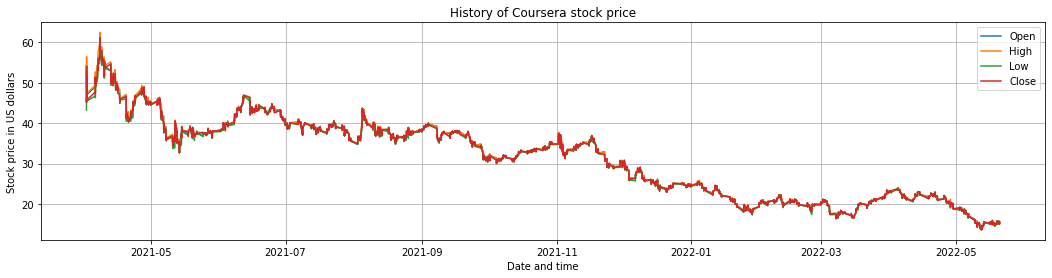

In [6]:
plt.figure(figsize = (18, 4))
plt.title("History of Coursera stock price")
plt.plot(dataset.index, dataset.Open)
plt.plot(dataset.index, dataset.High)
plt.plot(dataset.index, dataset.Low)
plt.plot(dataset.index, dataset.Close)
plt.xlabel("Date and time")
plt.ylabel("Stock price in US dollars")
plt.legend(["Open", "High", "Low", "Close"])
plt.grid()
plt.show()

In [11]:
# Time period of the stock price available

period = dataset.index[-1] - dataset.index[0]
print("The period of available stock price history is: {} days.".format(period.days))
prices = ["Open", "High", "Low", "Close"]

The period of available stock price history is: 414 days.


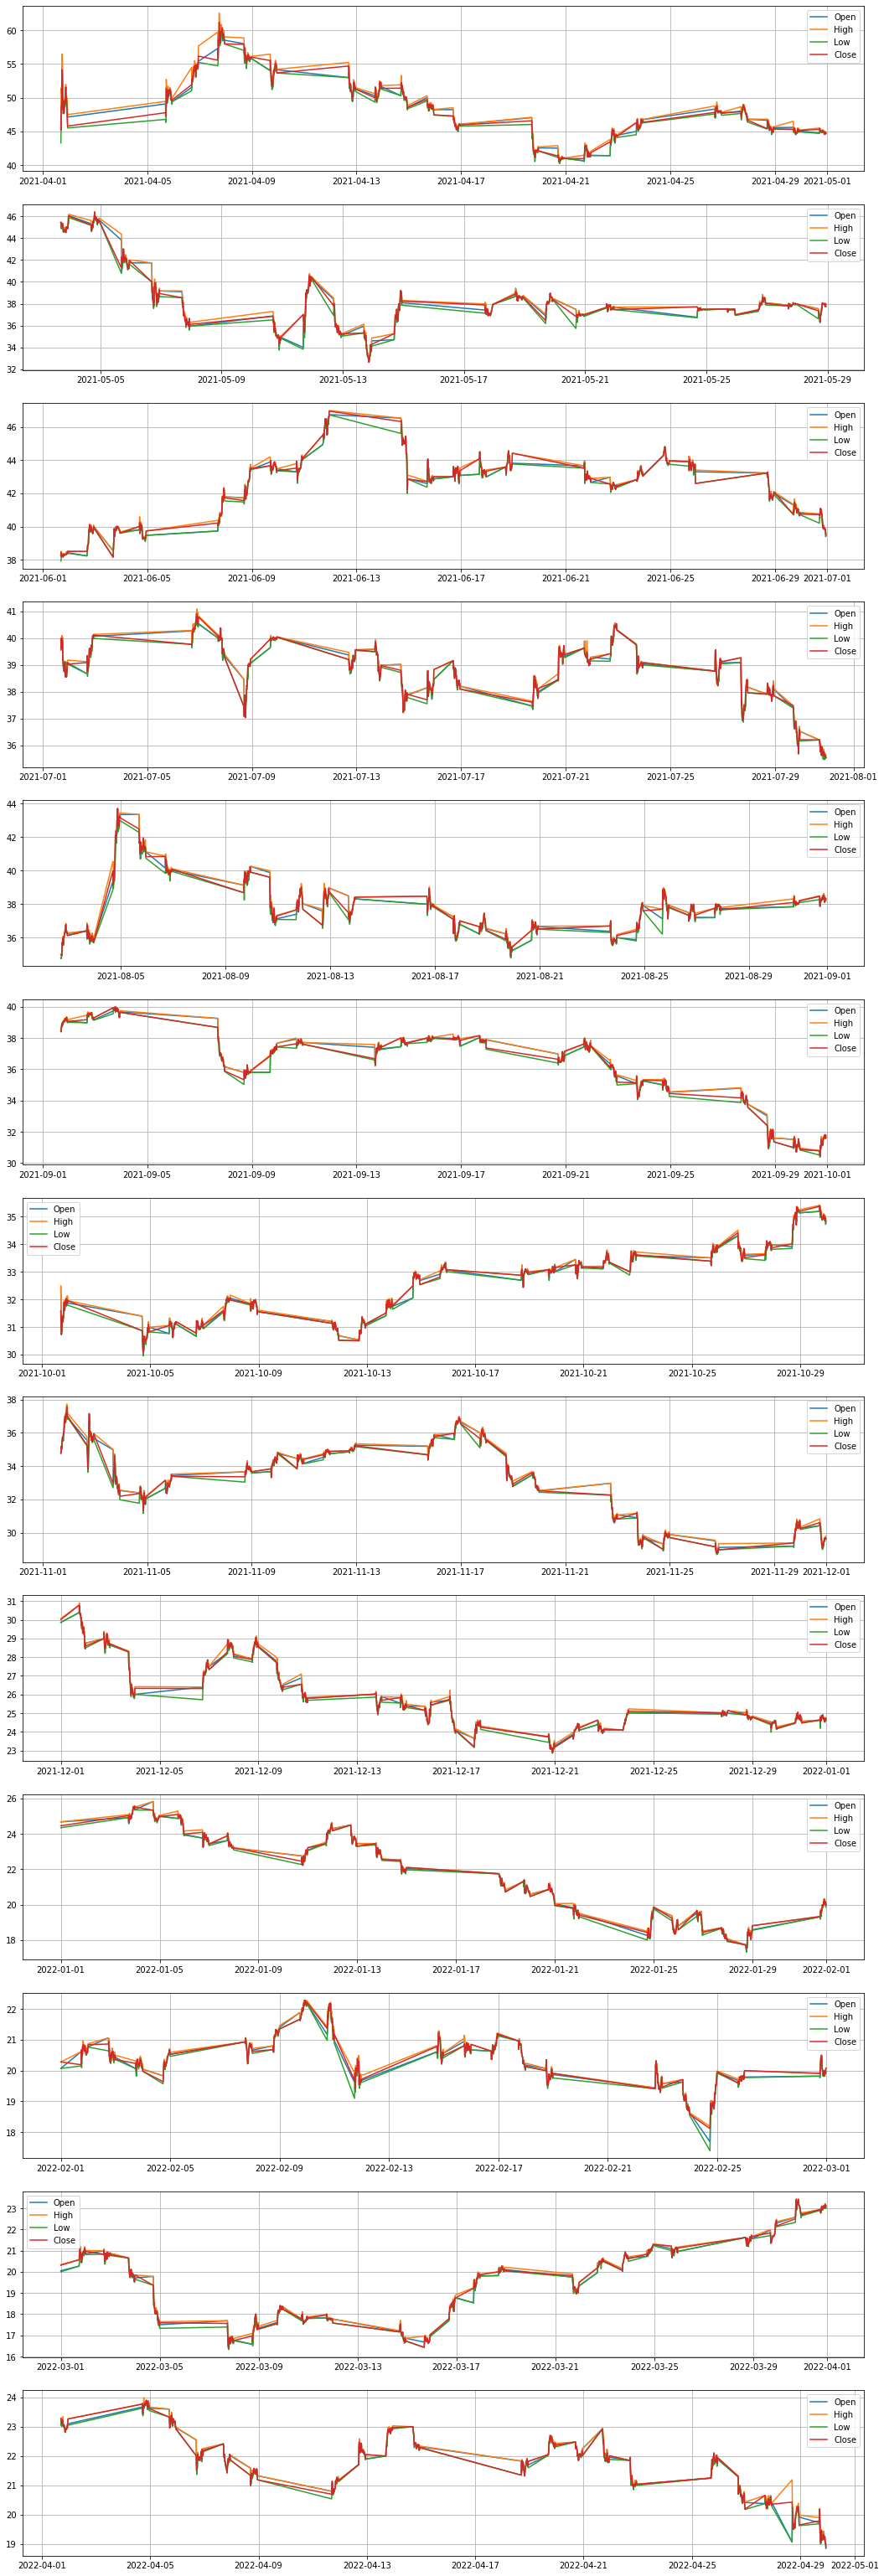

In [20]:
# Create graphs for monthly stock price changes

n_m = len(dataset.groupby([dataset.index.year, dataset.index.month]))
range_start = 0
i_m = 0
fig, axes = plt.subplots(n_m-1 , 1, figsize = (18, 4 * n_m))
for i in range(len(dataset)):
    if i == 0:
        continue
    elif dataset.index.month[i] != dataset.index.month[i-1]:
        for price in prices:
            axes[i_m].plot(dataset.index[range_start : i - 1], dataset[price][range_start : i - 1])
        axes[i_m].grid()
        axes[i_m].legend(prices)

        range_start = i
        i_m += 1
plt.show()

IndexError: index 74 is out of bounds for axis 0 with size 74

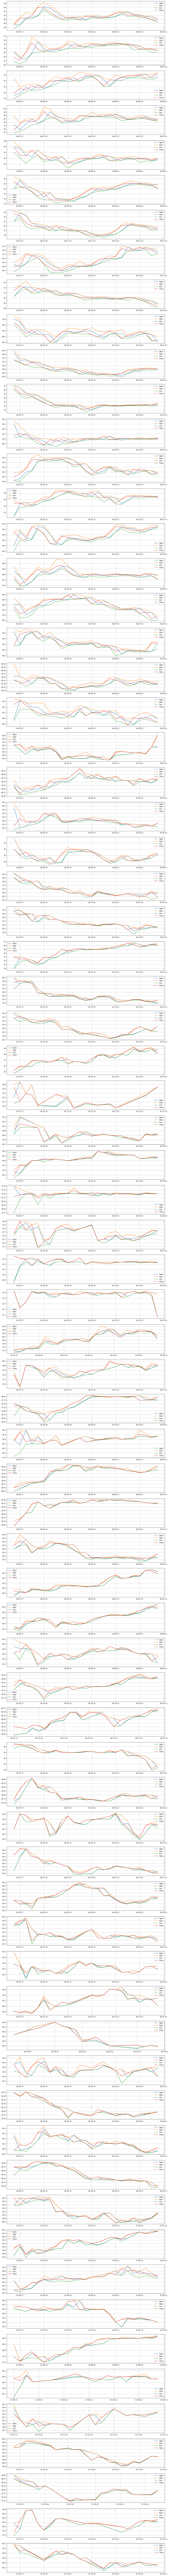

In [24]:
# Create graphs for weekly stock price changes

n_w = len(dataset.groupby([dataset.index.year, dataset.index.month, dataset.index.dayofweek]))
range_start = 0
i_w = 0
fig, axes = plt.subplots(n_w-1 , 1, figsize = (18, 4 * n_w))
for i in range(len(dataset)):
    if i == 0:
        continue
    elif dataset.index[i].dayofweek != dataset.index[i-1].dayofweek:
        for price in prices:
            axes[i_w].plot(dataset.index[range_start : i - 1], dataset[price][range_start : i - 1])
        axes[i_w].grid()
        axes[i_w].legend(prices)

        range_start = i
        i_w += 1
plt.show()